# Customer Segmentation

## 1.Problem statement:

This project understand the behaviour of the customers based on the credit card usage, spending and cash advance activities. The resulting customer segments will then be used to Predict, develop and implement new, tailored plans and schemes to improve customer engagement and offer relevant services.

## 2.Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\My_project\Customer_segmentation\Customer_data\Customer Data.csv",encoding="utf-8")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Shape of the dataset

In [3]:
df.shape

(8950, 18)

## Dataset Information

* CUST_ID - Customer ID
* BALANCE - Balance in the credit card account
* BALANCE_FREQUENCY - Ratio of month with non-zero balance to the total number of months
* PURCHASES - Total amount of purchase
* ONEOFF_PURCHASES - Maximum purchase done in one go
* INSTALLMENTS_PURCHASES - Total amount of purchase made in installments
* CASH_ADVANCE - Total amount of cash advanced 
* PURCHASES_FREQUENCY - Ratio of months purchase with the total number of months
* ONEOFF_PURCHASES_FREQUENCY - Ratio of months with one off purchases to the total number of months
* PURCHASES_INSTALLMENTS_FREQUENCY - Ratio of month with installment purchase to the total number if months
* CASH_ADVANCE_FREQUENCY - Ratio of month with Cash advance to the total number of months
* CASH_ADVANCE_TRX - Number of transaction made with cash advance
* PURCHASES_TRX - Number of Purchase transaction is made
* CREDIT_LIMIT - Limit of credit card for the user
* PAYMENTS - Total amount paid by user
* MINIMUM_PAYMENTS -  Minimum amount due by the user
* PRC_FULL_PAYMENT - Ratio of months with full payments to the total number of months
* TENURE - Number of months the customer has relationship with bank

## 3. Data Checks to perform

+ Check Missing values
+ Check Duplicates 
+ Check data types
+ Check the Descriptive statistics of the dataset


### 3.1 Check Missing values

In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### There are missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS

### 3.1.1 Filling missing values

In [5]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS']).mean()
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT']).mean()

In [6]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

#### There are No duplicate values in our dataset

### 3.3 Check data types

In [8]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### 3.4 Check the Descriptive Statistics

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.00000,8950.000000,8.950000e+03,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.44945,1733.143852,8.642065e+02,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,0.00000,2895.063757,1.136932e-13,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4494.44945,0.000000,8.642065e+02,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,4494.44945,383.276166,8.642065e+02,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,4494.44945,856.901546,8.642065e+02,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,4494.44945,1901.134317,8.642065e+02,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,4494.44945,50721.483360,8.642065e+02,1.000000,12.000000


## 4. Explore Data

### 4.1 Checking the distribution of the Balance column

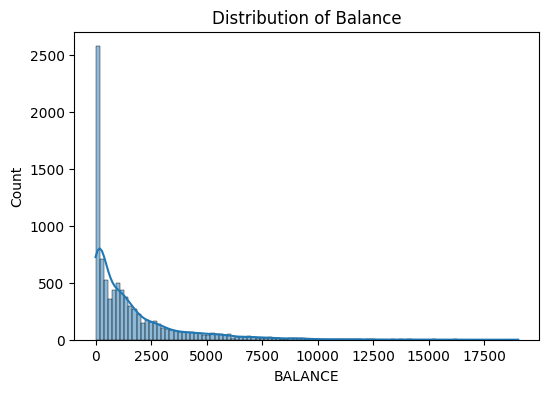

Skewness:  2.393386042571806


In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['BALANCE'],kde=True)
plt.title("Distribution of Balance")
plt.show()
print("Skewness: ",df['BALANCE'].skew())

### Observation:
* It is a right-skewed, most customers have low balance

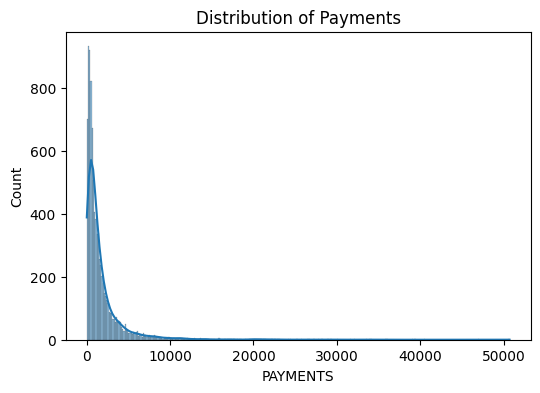

Skewness:  5.907619794397562


In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['PAYMENTS'],kde=True)
plt.title("Distribution of Payments")
plt.show()

print("Skewness: ",df['PAYMENTS'].skew())

### Observation:
* It is also highly right skewed, it is suggesting that we need to apply log1p

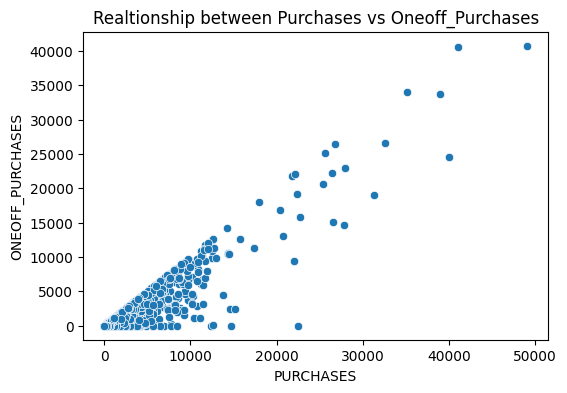

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['PURCHASES'],y=df['ONEOFF_PURCHASES'])
plt.title("Realtionship between Purchases vs Oneoff_Purchases")
plt.show()

### Observation
* We can observe that customers who spend more on purchases are also tend to make high one off_purchase

In [13]:
full_payment_customers = df[df["PRC_FULL_PAYMENT"] >= 0.9]
print(full_payment_customers[['CUST_ID','PRC_FULL_PAYMENT']].sort_values(by="PRC_FULL_PAYMENT",ascending=False).head())

     CUST_ID  PRC_FULL_PAYMENT
8940  C19181               1.0
6     C10007               1.0
8932  C19173               1.0
83    C10087               1.0
85    C10089               1.0


### Observation:
* They are the top 5 Customer who have paid full payments

In [14]:
Heavy_Cash_Advance_Customers = df[df["CASH_ADVANCE"] > df["CASH_ADVANCE"].quantile(0.75)]
print(Heavy_Cash_Advance_Customers[['CUST_ID','CASH_ADVANCE']].sort_values(by="CASH_ADVANCE",ascending=False).head())

     CUST_ID  CASH_ADVANCE
2159  C12226   47137.21176
1059  C11094   29282.10915
71    C10074   27296.48576
7254  C17450   26268.69989
7645  C17851   26194.04954


### Observation:
* They are the customer who use more cash advance

# 5. Transformation and Scaling

## 5.1 Creating a Copy of the Original Dataframe

In [112]:
#creating deep copy
df_copy = df.copy()
df_copy.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,4494.44945,201.802084,864.206542,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,4494.44945,4103.032597,864.206542,0.222222,12


## 5.1.1 Droping the Cutomer ID column

In [115]:
df_copy.drop(columns=['CUST_ID'], inplace=True)

In [117]:
df_copy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## 5.2 Checking the skewness which are highly positive and highly negative

In [120]:
from scipy.stats import skew
high_skewed = df.select_dtypes(include=['int64','float64']).apply(lambda x: skew(x.dropna()))
print(high_skewed.sort_values(ascending= False))


ONEOFF_PURCHASES                    10.043399
PURCHASES                            8.142904
INSTALLMENTS_PURCHASES               7.297897
PAYMENTS                             5.906630
CASH_ADVANCE_TRX                     5.720339
CASH_ADVANCE                         5.165743
PURCHASES_TRX                        4.629879
BALANCE                              2.392985
PRC_FULL_PAYMENT                     1.942494
CASH_ADVANCE_FREQUENCY               1.828380
ONEOFF_PURCHASES_FREQUENCY           1.535355
PURCHASES_INSTALLMENTS_FREQUENCY     0.509116
PURCHASES_FREQUENCY                  0.060154
BALANCE_FREQUENCY                   -2.022926
TENURE                              -2.942524
CREDIT_LIMIT                              NaN
MINIMUM_PAYMENTS                          NaN
dtype: float64


In [122]:
high_skewed_col = high_skewed[abs((high_skewed>1) | (high_skewed<-1)) ]
print(high_skewed_col)

BALANCE                        2.392985
BALANCE_FREQUENCY             -2.022926
PURCHASES                      8.142904
ONEOFF_PURCHASES              10.043399
INSTALLMENTS_PURCHASES         7.297897
CASH_ADVANCE                   5.165743
ONEOFF_PURCHASES_FREQUENCY     1.535355
CASH_ADVANCE_FREQUENCY         1.828380
CASH_ADVANCE_TRX               5.720339
PURCHASES_TRX                  4.629879
PAYMENTS                       5.906630
PRC_FULL_PAYMENT               1.942494
TENURE                        -2.942524
dtype: float64


In [124]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4494.44945,4103.032597,864.206542,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4494.44945,622.066742,864.206542,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.000000,12


## 5.3 Transformaing the high skewed column using log1p

In [127]:
high_skewed_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                       'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'TENURE']

for col in high_skewed_columns:
    if col in df_copy.columns:
        df_copy[col + "_log"] = np.log1p(df_copy[col])
    else:
        print(f"Columns not found in df_copy are {cols}, So skipping log transform for them")
print("Log transformed columns are")
df_copy.head()

Log transformed columns are


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,BALANCE_log,PURCHASES_log,ONEOFF_PURCHASES_log,INSTALLMENTS_PURCHASES_log,CASH_ADVANCE_log,CASH_ADVANCE_TRX_log,PURCHASES_TRX_log,PAYMENTS_log,TENURE_log
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,12,3.735304,4.568506,0.000000,4.568506,0.000000,0.000000,1.098612,5.312231,2.564949
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,12,8.071989,0.000000,0.000000,0.000000,8.770896,1.609438,0.000000,8.319725,2.564949
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7.822504,6.651791,6.651791,0.000000,0.000000,0.000000,2.564949,6.434654,2.564949
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,12,7.419183,7.313220,7.313220,0.000000,5.331694,0.693147,0.693147,0.000000,2.564949
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,12,6.707735,2.833213,2.833213,0.000000,0.000000,0.000000,0.693147,6.521114,2.564949


In [129]:
df_copy.drop(columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                       'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'TENURE'], axis =1, inplace=True)

In [131]:
df_copy.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'BALANCE_log', 'PURCHASES_log',
       'ONEOFF_PURCHASES_log', 'INSTALLMENTS_PURCHASES_log',
       'CASH_ADVANCE_log', 'CASH_ADVANCE_TRX_log', 'PURCHASES_TRX_log',
       'PAYMENTS_log', 'TENURE_log'],
      dtype='object')

In [133]:
df.shape

(8950, 18)

In [135]:
df_copy.shape

(8950, 17)

## 5.4 Scaling the data using Standard Scaler

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled_values = scaler.fit_transform(df_copy)

df_scaled = pd.DataFrame(df_scaled_values, columns = df_copy.columns)
df_scaled.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,BALANCE_log,PURCHASES_log,ONEOFF_PURCHASES_log,INSTALLMENTS_PURCHASES_log,CASH_ADVANCE_log,CASH_ADVANCE_TRX_log,PURCHASES_TRX_log,PAYMENTS_log,TENURE_log
0,-0.249434,-0.806490,-0.678661,-0.707313,-0.675349,0.0,1.136868e-13,-0.525551,-1.205218,-0.113532,-0.987090,0.394480,-0.930733,-0.810069,-0.579510,-0.824484,0.347262
1,0.134325,-1.221758,-0.678661,-0.916995,0.573963,0.0,1.136868e-13,0.234227,0.948918,-1.679855,-0.987090,-1.087454,1.528788,0.784603,-1.379210,1.065033,0.347262
2,0.518084,1.269843,2.673451,-0.916995,-0.675349,0.0,1.136868e-13,-0.525551,0.824993,0.600727,1.062022,-1.087454,-0.930733,-0.810069,0.487865,-0.119300,0.347262
3,-1.016953,-1.014125,-0.399319,-0.916995,-0.258913,0.0,1.136868e-13,-0.525551,0.624653,0.827499,1.265778,-1.087454,0.564372,-0.123281,-0.874655,-4.161996,0.347262
4,0.518084,-1.014125,-0.399319,-0.916995,-0.675349,0.0,1.136868e-13,-0.525551,0.271260,-0.708481,-0.114307,-1.087454,-0.930733,-0.810069,-0.874655,-0.064979,0.347262


# 6. Dimensionality Reduction (PCA)

## 6.1 Applying PCA

In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principle_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(principle_components, columns=['PCA-1','PCA-2','PCA-3','PCA-4','PCA-5','PCA-6'])
df_pca.head()

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6
0,-0.380018,-2.264228,-0.050870,0.864637,-0.405562,-0.237953
1,-3.386117,0.709425,-0.234797,0.712670,1.299141,0.536513
2,1.571746,0.891503,2.832326,0.326828,-0.838724,0.502740
3,-1.387625,-1.494334,1.735500,-0.552794,-2.285201,-1.388075
4,-1.175777,-1.002174,1.188338,1.510981,-0.354842,0.848890


In [154]:
pca_components = pd.DataFrame(pca.components_,columns= df_copy.columns, index=['PCA-1','PCA-2','PCA-3','PCA-4','PCA-5','PCA-6'])
pd.set_option('display.max_columns',None)
print(pca_components.T)

                                         PCA-1         PCA-2         PCA-3  \
BALANCE_FREQUENCY                 3.551868e-02  3.723281e-01 -9.281596e-02   
PURCHASES_FREQUENCY               3.739680e-01  1.191893e-01 -1.982291e-01   
ONEOFF_PURCHASES_FREQUENCY        2.254090e-01  2.377186e-01  4.527407e-01   
PURCHASES_INSTALLMENTS_FREQUENCY  3.195161e-01  6.358650e-02 -4.636537e-01   
CASH_ADVANCE_FREQUENCY           -2.425725e-01  3.362813e-01 -1.730365e-01   
CREDIT_LIMIT                     -0.000000e+00  0.000000e+00 -0.000000e+00   
MINIMUM_PAYMENTS                 -9.189783e-30 -1.105504e-30 -1.088003e-27   
PRC_FULL_PAYMENT                  1.713349e-01 -1.294020e-01 -7.190660e-02   
BALANCE_log                      -1.023386e-01  4.630147e-01  2.698113e-02   
PURCHASES_log                     3.697988e-01  1.144666e-01  1.004249e-01   
ONEOFF_PURCHASES_log              2.149160e-01  2.351368e-01  5.224978e-01   
INSTALLMENTS_PURCHASES_log        3.329051e-01  5.949797e-02 -3.

### 6.3 Check PCA variance ratio

In [155]:
print("PCA Explained Variance Ratio: ", pca.explained_variance_ratio_)

PCA Explained Variance Ratio:  [0.37992363 0.20783885 0.10338183 0.07748455 0.06747646 0.05411016]


In [156]:
print("PCA Cummulative Explained Variance Ratio: ", np.cumsum(pca.explained_variance_ratio_))

PCA Cummulative Explained Variance Ratio:  [0.37992363 0.58776248 0.69114432 0.76862886 0.83610532 0.89021548]


### 6.4 Scree plot

Text(0.5, 1.0, "Scree plot (Variance Explained by PC's)")

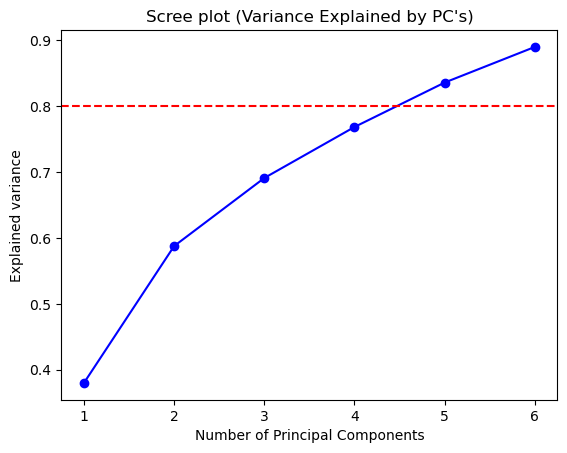

In [157]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'bo-')
plt.axhline(y=0.8,color='r',linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained variance")
plt.title("Scree plot (Variance Explained by PC's)")

### Observation:
* It is showing that PCA Explained about 89% of the data in the dataframe

# 7.K-Means CLustering

## 7.1 Elbow Method 

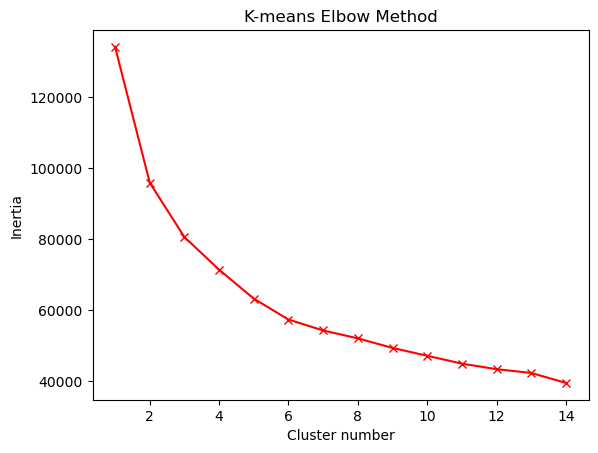

In [158]:
from sklearn.cluster import KMeans

inertia = []
range_v = range(1,15)

for i in range_v:
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range_v,inertia,'rx-')
plt.xlabel("Cluster number")
plt.ylabel("Inertia")
plt.title("K-means Elbow Method")
plt.show()

In [ ]:
### Observation:
* From Elbow Method, we can observe that a clear change in the slope of the line at 4 

## 7.2 Applying KMeans Algorithm 

In [159]:
k_means_model = KMeans(n_clusters=4,random_state=42)
k_means_model.fit_predict(df_pca)

array([1, 3, 2, ..., 1, 1, 0])

In [160]:
df_pca_clustered = pd.concat([df_pca,pd.DataFrame({"Clusters":k_means_model.labels_})],axis=1)
print(df_pca_clustered.head())

      PCA-1     PCA-2     PCA-3     PCA-4     PCA-5     PCA-6  Clusters
0 -0.380018 -2.264228 -0.050870  0.864637 -0.405562 -0.237953         1
1 -3.386117  0.709425 -0.234797  0.712670  1.299141  0.536513         3
2  1.571746  0.891503  2.832326  0.326828 -0.838724  0.502740         2
3 -1.387625 -1.494334  1.735500 -0.552794 -2.285201 -1.388075         1
4 -1.175777 -1.002174  1.188338  1.510981 -0.354842  0.848890         1


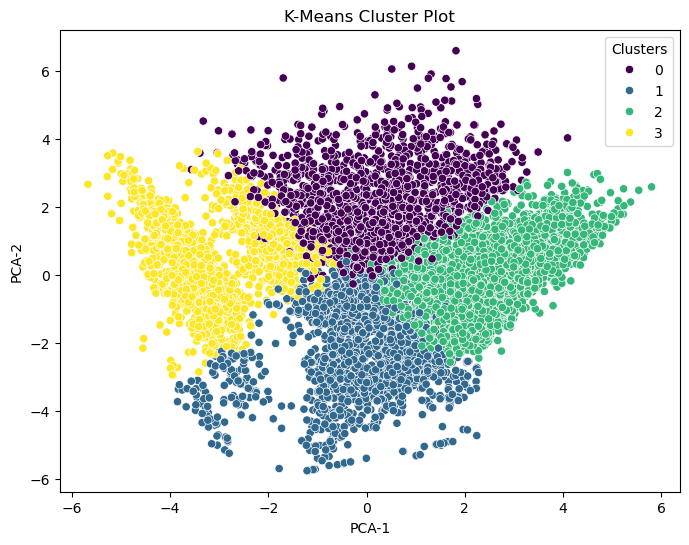

In [161]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA-1", y="PCA-2", data=df_pca_clustered,hue="Clusters",palette="viridis")
plt.title("K-Means Cluster Plot")
plt.show()

## Concatinating the label with Original Dataframe

In [162]:
clustered_customer_data = pd.concat([df,pd.DataFrame({"Clusters": k_means_model.labels_})],axis=1)
clustered_customer_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4494.44945,4103.032597,864.206542,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4494.44945,622.066742,864.206542,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.000000,12,1


## Converting into CSV file

In [ ]:
clustered_customer_data.to_csv("Clustered_customer_data.csv",index=False,header=True)